<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Binary_classifcation_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Problem 1

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data']], columns = iris['feature_names'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
target = pd.DataFrame(data= np.c_[iris['target']], columns = ['Species'])
target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = pd.concat([data, target], axis=1)
df = df.loc[df['Species'].isin([1, 2])]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
new_df = df.loc[:, ['sepal length (cm)', 'petal length (cm)', 'Species']]
new_df.head()

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


# Problem 2

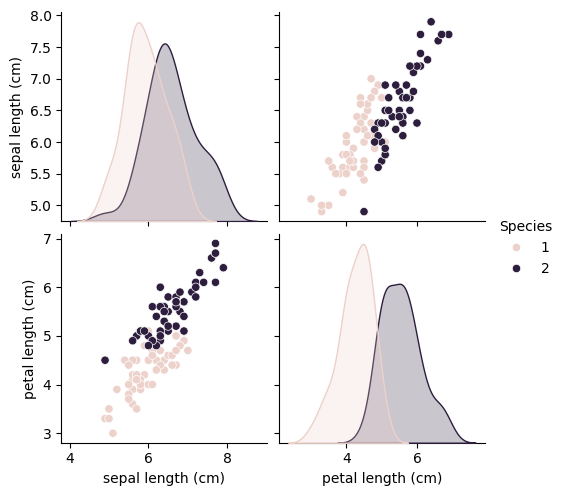

In [ ]:
sns.pairplot(data = new_df, hue = 'Species')

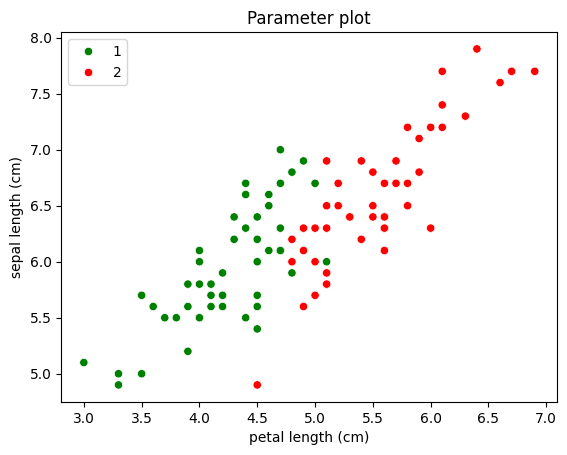

In [ ]:
colors =['green', 'red']
sns.scatterplot(x='petal length (cm)', y='sepal length (cm)', hue = 'Species', palette=colors, data = new_df)
plt.title('Parameter plot')
plt.legend(loc = 'upper left')
plt.show()

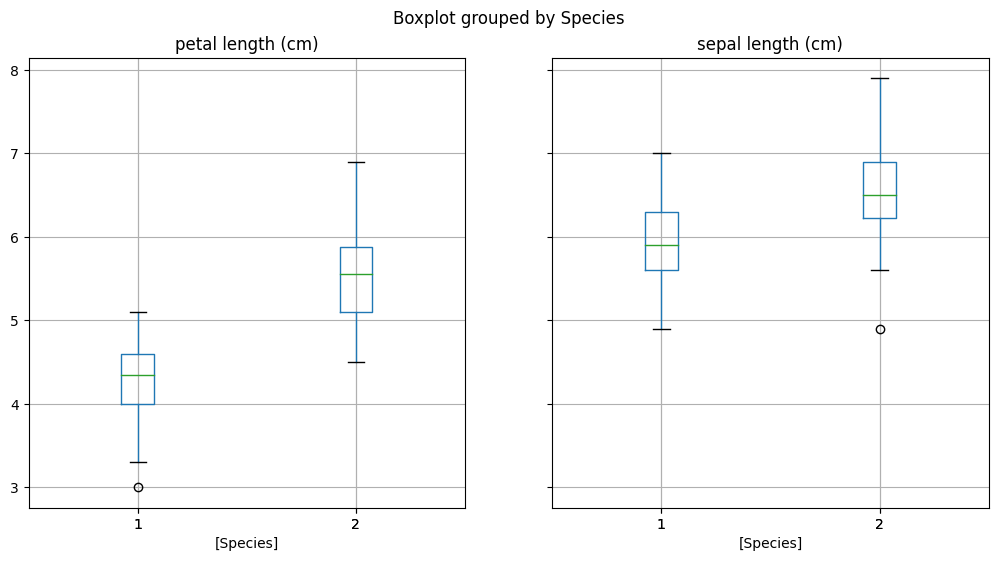

In [ ]:
new_df.boxplot(by="Species", figsize=(12, 6))
plt.show()

<Axes: xlabel='Species', ylabel='petal length (cm)'>

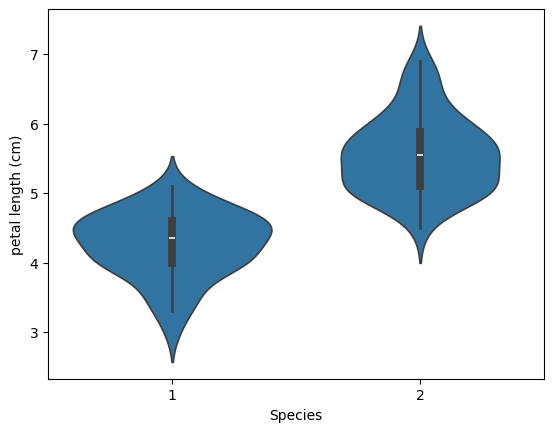

In [ ]:
sns.violinplot(x = 'Species', y = 'petal length (cm)', data= new_df)

# Problem 3

In [ ]:
X = np.array(new_df.drop(['Species'], axis = 1))
y = np.array(new_df.loc[:, ['Species']]).ravel()
X.shape, y.shape

((100, 2), (100,))

Splitting into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#pretreatment using standard scaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Problem 4

Standardizing the data

In [ ]:
X_trainT = scaler.fit_transform(X_train)
X_testT = scaler.fit_transform(X_test)

# Problem 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Instatiating the learning model k=5
model_k5 = KNeighborsClassifier(n_neighbors=5)
#fititng the model
model_k5.fit(X_trainT, y_train)

y_pred_k5 = model_k5.predict(X_testT)
print('the predicted model for n=5', y_pred_k5)

#Instatiating the learning model k=5
model_k1 = KNeighborsClassifier(n_neighbors=1)
#fititng the model
model_k1.fit(X_trainT, y_train)

y_pred_k1 = model_k1.predict(X_test)
print('the predicted model for n=1', y_pred_k1)

#Instatiating the learning model k=3
model_k3 = KNeighborsClassifier(n_neighbors=3)
#fititng the model
model_k3.fit(X_trainT, y_train)

y_pred_k3 = model_k3.predict(X_testT)
print('the predicted model for n=3', y_pred_k3)

the predicted model for n=5 [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]
the predicted model for n=1 [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
the predicted model for n=3 [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2]


# Problem 6

# Evaluation

In [ ]:
#evaluating the performance of the model using classifcation report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred_list = [y_pred_k5, y_pred_k1, y_pred_k3]
prediction= ['y_pred_k5', 'y_pred_k1', 'y_pred_k3']
for i, y_pred in enumerate(y_pred_list):
  cl_report = classification_report(y_test, y_pred)
  cf_matrix = confusion_matrix(y_test, y_pred)
  print(f'classification report for {i}:\n{cl_report}')
  print(f'Confusion matrix  for {i}:\n{cf_matrix}')

classification report for 0:
              precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.77      0.91      0.83        11

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25

Confusion matrix  for 0:
[[11  3]
 [ 1 10]]
classification report for 1:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.80      0.73      0.76        11

    accuracy                           0.80        25
   macro avg       0.80      0.79      0.79        25
weighted avg       0.80      0.80      0.80        25

Confusion matrix  for 1:
[[12  2]
 [ 3  8]]
classification report for 2:
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.83      0.91      0.87        11

    acc

Accuracy, recall, precision, and F1 score are important evaluation metrics used to assess the performance of a classification model.

Accuracy is simply the percentage of predictions that the model got right out of all the predictions it made. It's like checking how many questions you answered correctly on a test. However, accuracy alone can be misleading, especially if the dataset is imbalanced, meaning one class has way more examples than the other(s).

Precision measures how many of the positive predictions made by the model were actually correct. It's like checking how many times you raised your hand in class when you really knew the answer. High precision is important when you don't want too many false positives, like in spam detection.

Recall, on the other hand, looks at how many of the actual positive instances in the data were correctly identified by the model. It's like checking how many times you knew the answer but didn't raise your hand. High recall is crucial when missing a positive instance can be costly, like in disease diagnosis.

The F1 score combines precision and recall into a single metric, giving equal importance to both. It's like getting a balanced grade that considers your performance on multiple aspects of the test. A high F1 score means the model has a good balance between precision and recall.

To evaluate a classification model properly, we should look at all four metrics together. Accuracy alone can be deceiving, while precision, recall, and F1 score give us a more complete picture of how well the model is performing and where it might be struggling.

# Problem 7

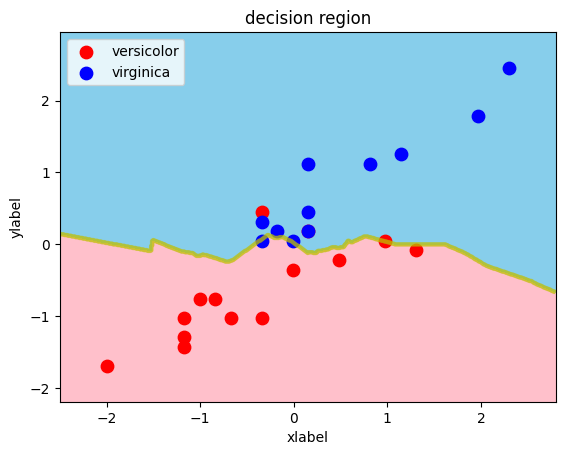

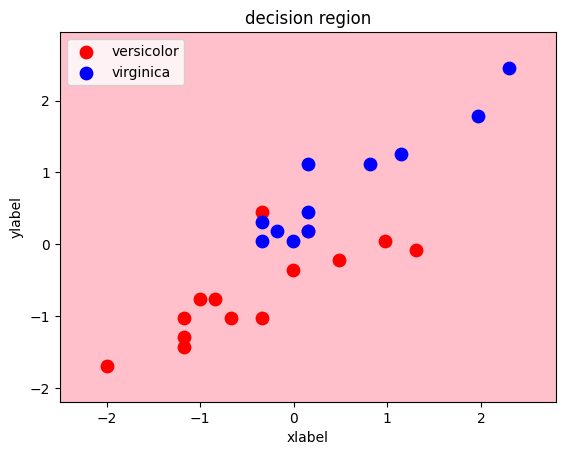

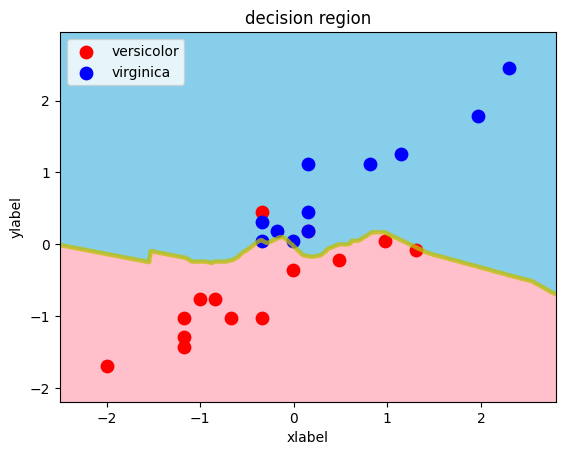

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

models = [model_k5, model_k1, model_k3]
for i, model in enumerate(models, 0):
  decision_region(X_testT, y_test, model)


# Problem 8: Learning by other methods

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Instantiating the model
model_kn = KNeighborsClassifier()
model_kn.fit(X_trainT, y_train)
ypred = model_kn.predict(X_testT)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Instantiating the Logsitic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_trainT, y_train)
y_pred1 = model_lr.predict(X_testT)

SVM



In [ ]:
from sklearn.svm import SVC
#Instantiating the SVC model
model_scv = SVC()
model_scv.fit(X_trainT, y_train)
y_pred2 = model_scv.predict(X_testT)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#instantaiating the decision tree model
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_trainT, y_train)
y_pred3 = model_dtc.predict(X_testT)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#intantiting the Rnadomforest classifier model
model_rfc = RandomForestClassifier()
model_rfc.fit(X_trainT, y_train)
y_pred4 = model_rfc.predict(X_testT)

# Evaluation

KNN
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]
Accuracy score of the KNN model is: 84.0
precision score of the KNN model is: [0.91666667 0.76923077]
f1_score of the model: [0.84615385 0.83333333]
recall score of the model is: [0.78571429 0.90909091]
Confusion Matrix of the model is: [[12  2]
 [ 1 10]]




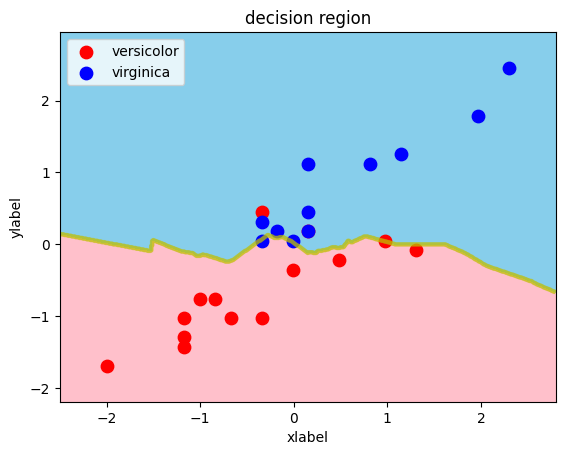

In [ ]:
#evaluating the performance of the model
from sklearn.metrics import accuracy_score,  precision_score, f1_score, recall_score

print('KNN')
print(ypred)
print(f'Accuracy score of the KNN model is:', accuracy_score(y_test, ypred)*100)
print(f'precision score of the KNN model is:', precision_score(y_test, ypred, average = None))
print(f'f1_score of the model:', f1_score(y_test, ypred, average = None))
print(f'recall score of the model is:', recall_score(y_test, ypred, average = None))
print('Confusion Matrix of the model is:', confusion_matrix(y_test, y_pred))
print('\n')
decision_region(X_testT, y_test, model_kn)

Logistic Regression
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
Accuracy score of the Logistic Regresiion model is: 92.0
precision score of the Logistic Regression model is: [1.         0.84615385]
f1_score of the model: [0.92307692 0.91666667]
recall score of the model is: [0.85714286 1.        ]
Confusion Matrix of the model is: [[12  2]
 [ 0 11]]




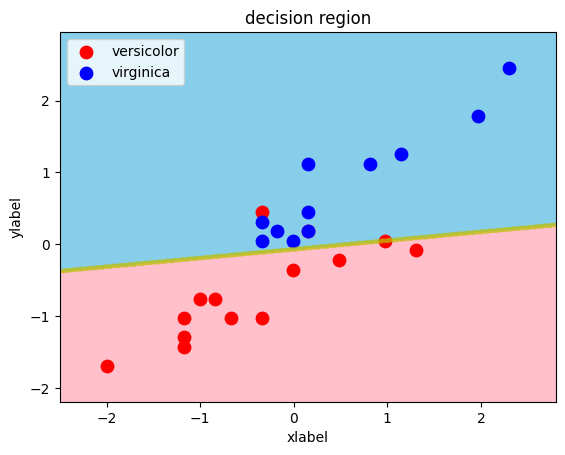

In [ ]:
print('Logistic Regression')
print(y_pred1)
print('Accuracy score of the Logistic Regresiion model is:', accuracy_score(y_test, y_pred1)*100)
print('precision score of the Logistic Regression model is:', precision_score(y_test, y_pred1, average = None))
print('f1_score of the model:', f1_score(y_test, y_pred1, average = None))
print('recall score of the model is:', recall_score(y_test, y_pred1, average = None))
print('Confusion Matrix of the model is:', confusion_matrix(y_test, y_pred1))

print('\n')
decision_region(X_testT, y_test, model_lr)

SVC
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 2 1 2]
Accuracy score of the SVC model is: 88.0
precision score of the SVC model is: [1.         0.78571429]
f1_score of the model: [0.88 0.88]
recall score of the model is: [0.78571429 1.        ]
Confusion Matrix of the model is: [[11  3]
 [ 0 11]]




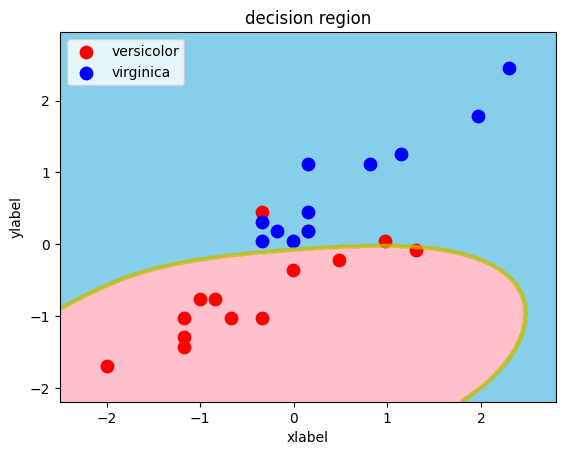

In [ ]:
print('SVC')
print(y_pred2)
print('Accuracy score of the SVC model is:', accuracy_score(y_test, y_pred2)*100)
print('precision score of the SVC model is:', precision_score(y_test, y_pred2, average = None))
print('f1_score of the model:', f1_score(y_test, y_pred2, average = None))
print('recall score of the model is:', recall_score(y_test, y_pred2, average = None))
print('Confusion Matrix of the model is:', confusion_matrix(y_test, y_pred2))
print('\n')
decision_region(X_testT, y_test, model_scv)

Decision Tree Classifier
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
Accuracy score of the Decision Tree model is: 92.0
precision score of the KNN model is: [1.         0.84615385]
f1_score of the model: [0.92307692 0.91666667]
recall score of the model is: [0.85714286 1.        ]
Confusion Matrix of the model is: [[12  2]
 [ 0 11]]




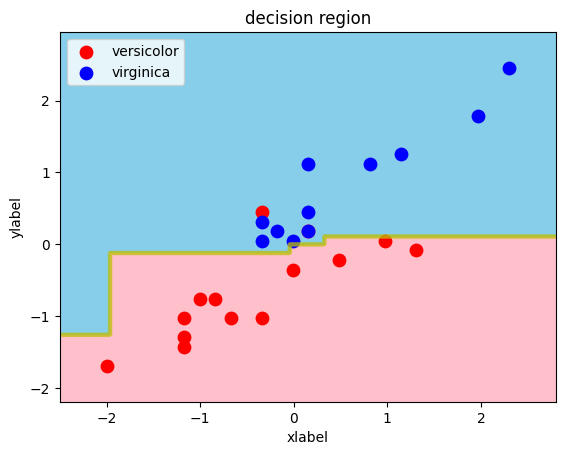

In [ ]:
print('Decision Tree Classifier')
print(y_pred3)
print('Accuracy score of the Decision Tree model is:', accuracy_score(y_test, y_pred3)*100)
print('precision score of the KNN model is:', precision_score(y_test, y_pred3, average = None))
print('f1_score of the model:', f1_score(y_test, y_pred3, average = None))
print('recall score of the model is:', recall_score(y_test, y_pred3, average = None))
print('Confusion Matrix of the model is:', confusion_matrix(y_test, y_pred3))
print('\n')
decision_region(X_testT, y_test, model_dtc)

Random Forest Classifier
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
Accuracy score of the Random Forest model is: 92.0
precision score of the Random Forest model is: [1.         0.84615385]
f1_score of the model: [0.92307692 0.91666667]
recall score of the model is: [0.85714286 1.        ]
Confusion Matrix of the model is: [[12  2]
 [ 0 11]]




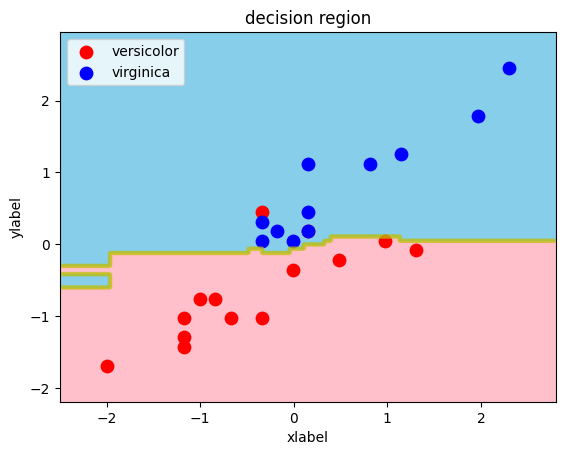

In [ ]:
print('Random Forest Classifier')
print(y_pred4)
print('Accuracy score of the Random Forest model is:', accuracy_score(y_test, y_pred4)*100)
print('precision score of the Random Forest model is:', precision_score(y_test, y_pred4, average = None))
print('f1_score of the model:', f1_score(y_test, y_pred4, average = None))
print('recall score of the model is:', recall_score(y_test, y_pred4, average = None))
print('Confusion Matrix of the model is:', confusion_matrix(y_test, y_pred4))
print('\n')
decision_region(X_testT, y_test, model_rfc)

Discussion:
Standardization is a technique used to rescale the features of a dataset to have a mean of zero and a standard deviation of one. It is done by subtracting the mean and dividing by the standard deviation of each feature.

the visulaization of the models without pretreatment reveals that the model is overfitted and it has a lower accuracy than the model with pretreatment. thiis denotes how important scaling is to a model.


## Problem 9

In [ ]:
def check_wt_standard(title, prediction, model, std):
  print(title)
  print('Accuracy:', accuracy_score(y_test, y_pred)*100)
  print('Recall score:',  recall_score(y_test, y_pred, average = None))
  print('Precision score', precision_score(y_test, y_pred, average = None))
  print('F1 score', f1_score(y_test, y_pred, average = None))
  print('COnfusion Matrix:', confusion_matrix(y_test, y_pred))
  decision_region(X_test, y_test, model)
model = [model_kn, model_lr, model_scv, model_dtc, model_rfc]

KNN
Accuracy: 80.0
Recall score: [0.92857143 0.63636364]
Precision score [0.76470588 0.875     ]
F1 score [0.83870968 0.73684211]
COnfusion Matrix: [[13  1]
 [ 4  7]]


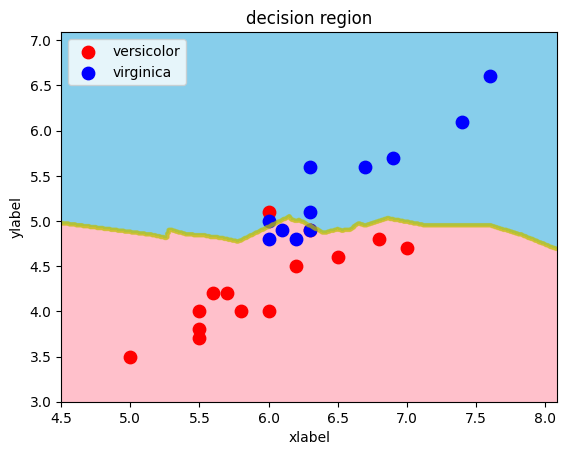



Logistic Regression
Accuracy: 80.0
Recall score: [0.92857143 0.63636364]
Precision score [0.76470588 0.875     ]
F1 score [0.83870968 0.73684211]
COnfusion Matrix: [[13  1]
 [ 4  7]]


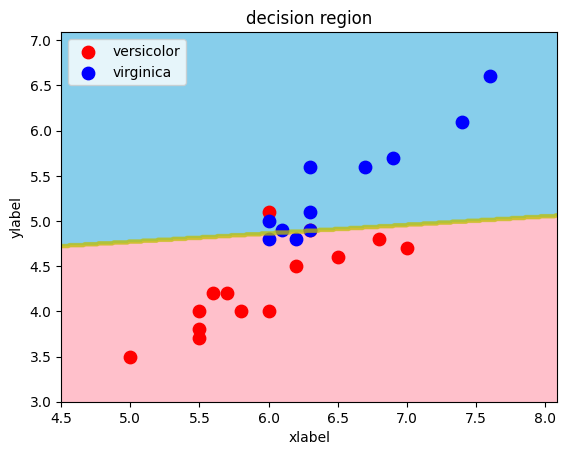



SVC
Accuracy: 80.0
Recall score: [0.92857143 0.63636364]
Precision score [0.76470588 0.875     ]
F1 score [0.83870968 0.73684211]
COnfusion Matrix: [[13  1]
 [ 4  7]]


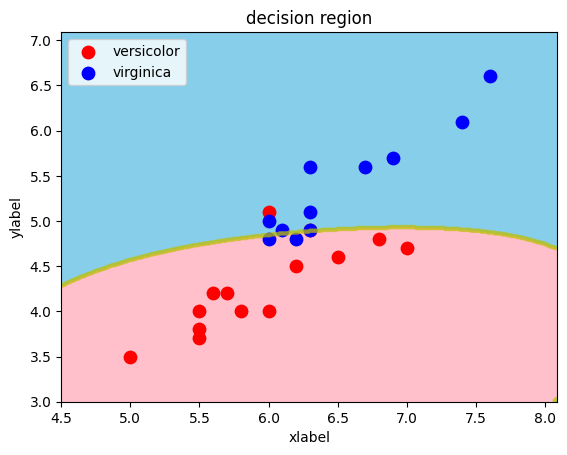



Decision Tree
Accuracy: 80.0
Recall score: [0.92857143 0.63636364]
Precision score [0.76470588 0.875     ]
F1 score [0.83870968 0.73684211]
COnfusion Matrix: [[13  1]
 [ 4  7]]


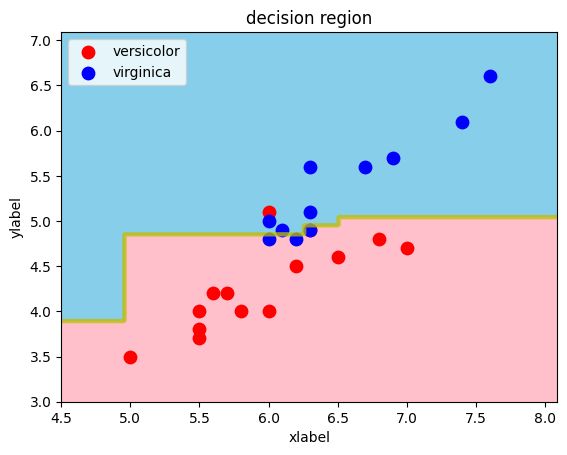



Random Forest Classifier
Accuracy: 80.0
Recall score: [0.92857143 0.63636364]
Precision score [0.76470588 0.875     ]
F1 score [0.83870968 0.73684211]
COnfusion Matrix: [[13  1]
 [ 4  7]]


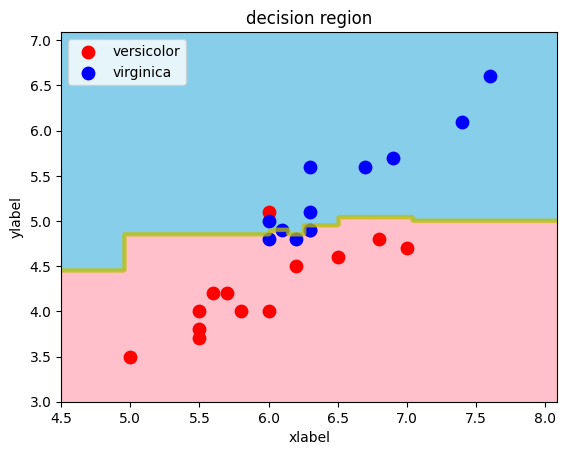

In [ ]:
#KNN
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
y_pred = model_kn.predict(X_test)
check_wt_standard('KNN', y_pred, model_kn, std = False)
print('\n')

#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred1 = model_lr.predict(X_test)
check_wt_standard('Logistic Regression', y_pred1, model_lr, std= False)
print('\n')

#SVM
model_scv = SVC()
model_scv.fit(X_train, y_train)
y_pred2 =model_scv.predict(X_test)
check_wt_standard('SVC', y_pred2, model_scv, std = False)
print('\n')

#Decision Tree
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred3 = model_dtc.predict(X_test)
check_wt_standard('Decision Tree', y_pred3, model_dtc, std=False)
print('\n')

#Random Forest Classifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_pred4 = model_rfc.predict(X_test)
check_wt_standard('Random Forest Classifier', y_pred4, model_rfc, std = False)

### Problem 10: Highly accurate method

In [ ]:
X1 = np.array(data.loc[:, ['sepal length (cm)', 'petal length (cm)']])
X1.shape

(150, 2)

In [ ]:
new_y = np.array(target).ravel()
new_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#training the new dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, new_y, test_size = 0.25, random_state =42)

In [ ]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((112, 2), (38, 2), (112,), (38,))

In [ ]:
#using the models to evaluate the dataset
from sklearn.neighbors import KNeighborsClassifier

#Instatiating the learning model k=5
model_kn5 = KNeighborsClassifier(n_neighbors=5)
#fititng the model
model_kn5.fit(X_train1, y_train1)

y_pred_kn5 = model_kn5.predict(X_test1)
print('the predicted model for n=5', y_pred_kn5)

#Instatiating the learning model k=5
model_kn1 = KNeighborsClassifier(n_neighbors=1)
#fititng the model
model_kn1.fit(X_train1, y_train1)

y_pred_kn1 = model_kn1.predict(X_test1)
print('the predicted model for n=1', y_pred_kn1)

#Instatiating the learning model k=3
model_kn3 = KNeighborsClassifier(n_neighbors=3)
#fititng the model
model_kn3.fit(X_train1, y_train1)

y_pred_kn3 = model_k3.predict(X_test1)
print('the predicted model for n=3', y_pred_kn3)

the predicted model for n=5 [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
the predicted model for n=1 [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 1 2 2 0 0 0 0 1 0 0 1 1
 0]
the predicted model for n=3 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


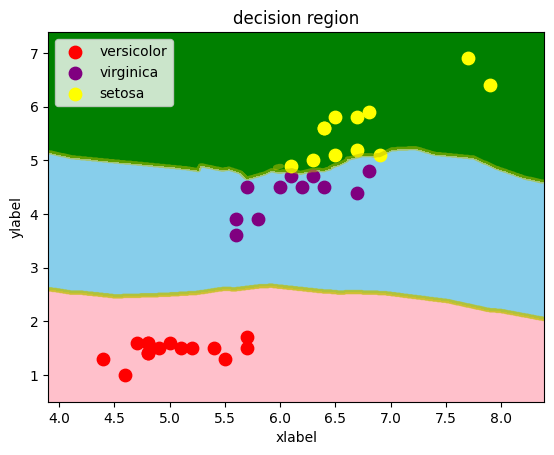

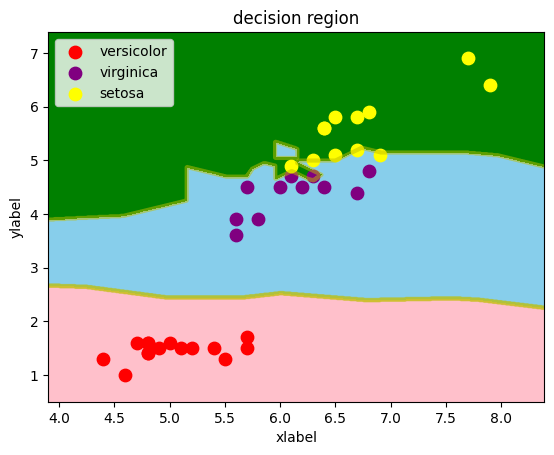

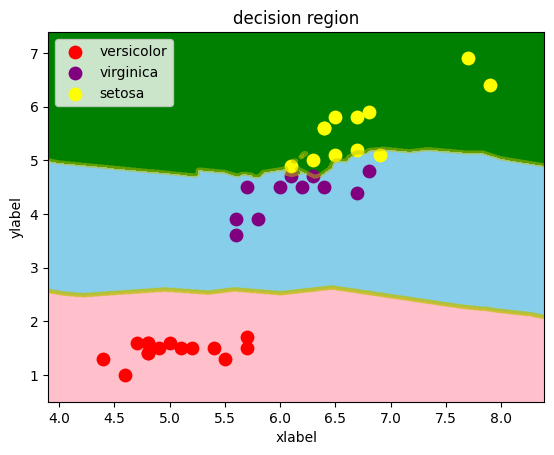

In [ ]:
#plotting the map of the decision region
def decision_region(X1, new_y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica', 'setosa']):
    scatter_color = ['red', 'purple', 'yellow']
    contourf_color = ['pink', 'skyblue', 'green']
    n_class = 3  # Change this to 3 for three classes
    # pred mesh
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X1[:,0])-0.5, np.max(X1[:,0])+0.5, step),
                                   np.arange(np.min(X1[:,1])-0.5, np.max(X1[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(np.unique(new_y)):
        plt.scatter(X1[new_y==target][:, 0], X1[new_y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

models = [model_kn5, model_kn1, model_kn3]
for i, model in enumerate(models, 1):
    decision_region(X_test1, y_test1, model)


# Evaluting the dataset using the models


KNN Model:
Accuracy of the model:  97.36842105263158
Recall score:  [1.         1.         0.91666667]
Precision score:  [1.         0.91666667 1.        ]
F1 score:  [1.         0.95652174 0.95652174]
Confusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


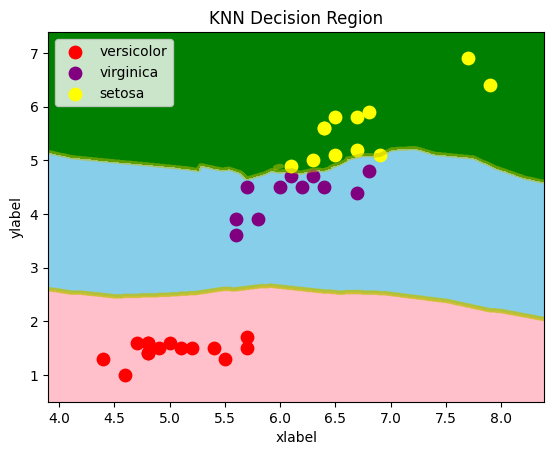


Logistic Regression Model:
Accuracy of the model:  100.0
Recall score:  [1. 1. 1.]
Precision score:  [1. 1. 1.]
F1 score:  [1. 1. 1.]
Confusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


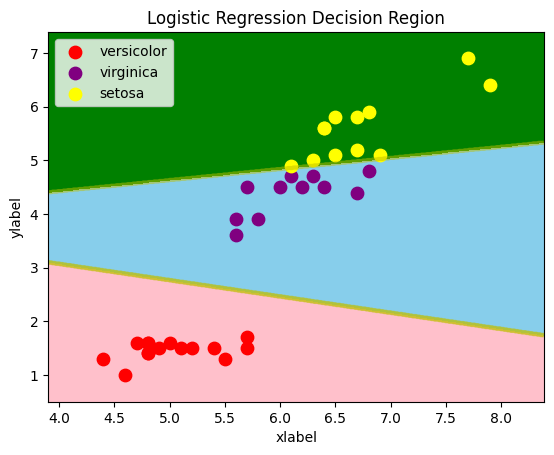


SVM Model:
Accuracy of the model:  100.0
Recall score:  [1. 1. 1.]
Precision score:  [1. 1. 1.]
F1 score:  [1. 1. 1.]
Confusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


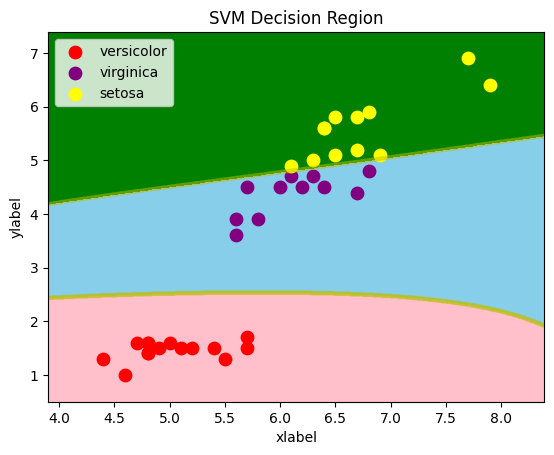


Decision Tree Model:
Accuracy of the model:  100.0
Recall score:  [1. 1. 1.]
Precision score:  [1. 1. 1.]
F1 score:  [1. 1. 1.]
Confusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


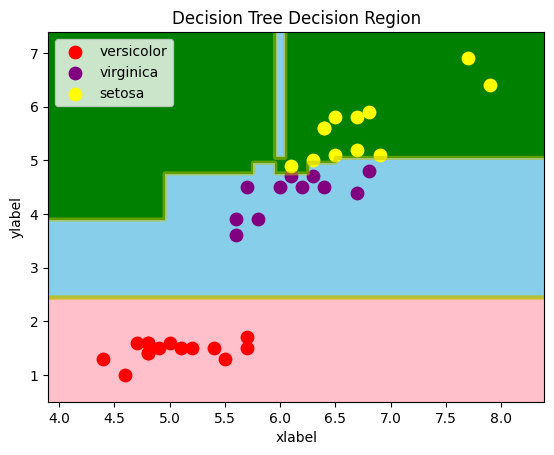


Random Forest Model:
Accuracy of the model:  100.0
Recall score:  [1. 1. 1.]
Precision score:  [1. 1. 1.]
F1 score:  [1. 1. 1.]
Confusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


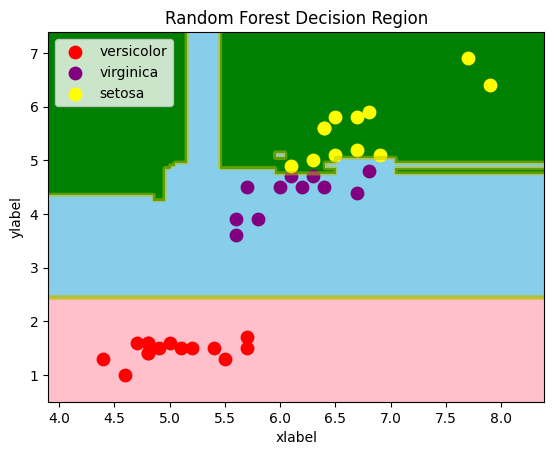

In [74]:
# Instantiate the models
models = [
    ("KNN", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())
]
# Train the models
for name, model in models:
    model.fit(X_train1, y_train1)

# Evaluate the models
for name, model in models:
    y_pred = model.predict(X_test1)
    print(f"\n{name} Model:")
    print('Accuracy of the model: ', accuracy_score(y_test1, y_pred)*100)
    print('Recall score: ', recall_score(y_test1, y_pred, average=None))
    print('Precision score: ', precision_score(y_test1, y_pred, average=None))
    print('F1 score: ', f1_score(y_test1, y_pred, average=None))
    print('Confusion matrix: ', confusion_matrix(y_test1, y_pred))
    decision_region(X_test1, y_test1, model, title=f"{name} Decision Region")

the visualization reveals that the model such as all the model but KNN performed excellently well at classifying the Iris dataset having an accuracy of 100%.